# Pymaceuticals Inc.
---

### Analysis

In this study, mice with squamous cell carcinoma tumors were treated to study the effectiveness of 10 anti-cancer medications.  The top four medications (Capomulin, Ramicane, Imbufinol, and Ceftamin) were selected for closer evaluation due to statistical analytics showing the tightest groupings of variance, standard deviation, and standard error of the mean.

Based on the box-plots of the final tumor volumes after treatment, the effectiveness of the primary study drug, Capomulin, appears to be very comparable to that of Ramicane. Both Capomulin and Ramicane were found to be more effective than the other medications.  Only one potential data outlier was identified, for Infubinol, indicating a strong consistency across the collected data.

The results of the scatter plot do suggest that the effectiveness of Capomulin diminishes with increasing weight of the mouse.  This is confirmed by a correlation coefficient of 0.84, just under a one-to-one relationship between weight and tumor size.  Likewise, the linear regression shows a slope of 0.95, which suggests that for every 1 gram of increased weight, there is an increase of 0.95 mm3 in tumor volume. There may be potential underlying explanations to explain the diminishing effectiveness at higher weights, such as necessary dose or concentration adjustments for larger mice, which may be responsible, but this is conjecture as it is beyond the scope of this study.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
mouse_data_complete_df = pd.DataFrame(mouse_data_complete)

# Display the data table for preview
mouse_data_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the unique number of mice.
mouse_count = mouse_data_complete_df["Mouse ID"].value_counts()
mouse_count

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = mouse_data_complete_df[mouse_data_complete_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Retrieve duplicate Mouse ID from duplicate_df (Source: https://github.com/lanakimova/matplotlib-challenge/blob/master/%20pymaceuticals_analysis.ipynb).
dupe_mouse = duplicate_df["Mouse ID"].unique()
dupe_mouse = dupe_mouse[0]
dupe_mouse

'g989'

In [5]:
# Delete rows containing duplicate mouse's ID (source: https://github.com/lanakimova/matplotlib-challenge/blob/master/%20pymaceuticals_analysis.ipynb).
mouse_data_complete_df.drop(mouse_data_complete_df[mouse_data_complete_df["Mouse ID"] == dupe_mouse].index, inplace=True)
len(mouse_data_complete_df["Mouse ID"].unique())

248

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_df = duplicate_df[duplicate_df["Mouse ID"] == "g989"]
dupe_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_df = pd.DataFrame(mouse_data_complete_df)
clean_mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = len(mouse_data_complete_df["Mouse ID"].unique())
mouse_count_clean

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = clean_mouse_data_df.groupby(["Drug Regimen"])
tumor_mean = regimen_df["Tumor Volume (mm3)"].mean()
tumor_median = regimen_df["Tumor Volume (mm3)"].median()
tumor_variance = regimen_df["Tumor Volume (mm3)"].var()
tumor_STD = regimen_df["Tumor Volume (mm3)"].std()
tumor_SEM = regimen_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
regimen_summary_df = pd.DataFrame({"Mean": tumor_mean,
                                   "Median": tumor_median,
                                   "Variance": tumor_variance,
                                   "Standard Deviation": tumor_STD,
                                   "SEM": tumor_SEM})
regimen_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line (Source: https://github.com/jaysueno/pymaceuticals/blob/master/Pymaceuticals/Pymaceuticals_jay_v2_FINALSUBMISSION.ipynb).
regimen_agg_df = clean_mouse_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
regimen_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

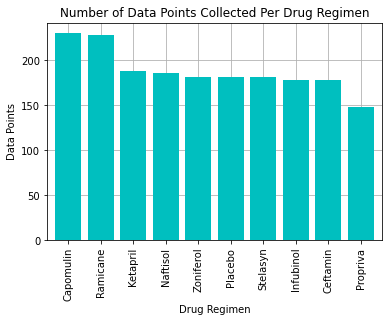

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_pandas_df = clean_mouse_data_df["Drug Regimen"].value_counts()

# Format the bar graph.
bar_pandas_df.plot.bar(color="c", align="center", width=0.8, zorder=2)
plt.title("Number of Data Points Collected Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.grid(zorder=0)

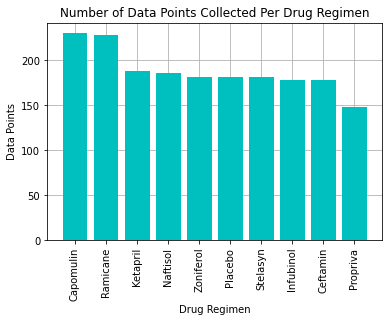

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Calculate the number of data points for each drug regimen and set the x-axis to the length of this series (Source: https://github.com/benanza/Pymaceuticals/blob/master/Pymaceuticals.ipynb)
bar_py_df = clean_mouse_data_df["Drug Regimen"].value_counts()
bar_py_x = np.arange(len(bar_py_df))

# Format the bar graph.
plt.bar(bar_py_x, bar_py_df, color="c", align="center", width=0.8, zorder=2)
ticks = [value for value in bar_py_x]
plt.xticks(ticks, bar_py_df.index.values)
plt.xticks(rotation=90)
plt.title("Number of Data Points Collected Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.grid(zorder=0)

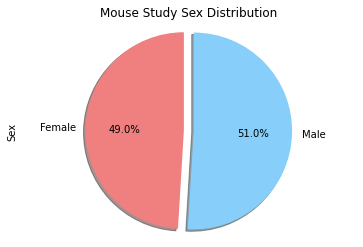

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie = clean_mouse_data_df.groupby(["Sex"])["Sex"].count()
colors= ["lightcoral", "lightskyblue"]
explode = (0.1, 0)
pie.plot.pie(colors=colors, explode=explode, startangle=90, autopct="%1.1f%%", title="Mouse Study Sex Distribution", shadow=True)
plt.axis("equal")
plt.show()

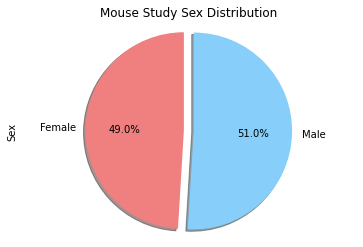

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie, labels=("Female", "Male"), explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Mouse Study Sex Distribution")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Create a new dataframe to find the final tumor volume.
final_tumor_volume_df = clean_mouse_data_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Remove rows from dataframe not related to the 4 treatments above (Source: https://github.com/lanakimova/matplotlib-challenge/blob/master/%20pymaceuticals_analysis.ipynb).
final_tumor_volume_df = final_tumor_volume_df.sort_values(["Mouse ID", "Timepoint"])
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"].isin(treatments)]
final_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
454,a203,0,45.000000,Infubinol
455,a203,5,48.508468,Infubinol
456,a203,10,51.852437,Infubinol
457,a203,15,52.777870,Infubinol
458,a203,20,55.173336,Infubinol
...,...,...,...,...
1868,z581,25,54.316407,Infubinol
1869,z581,30,56.286750,Infubinol
1870,z581,35,58.628399,Infubinol
1871,z581,40,60.053740,Infubinol


In [16]:
# Start by getting the last (greatest) timepoint for each mouse (Source: https://github.com/benanza/Pymaceuticals/blob/master/Pymaceuticals.ipynb).
max_time_df = clean_mouse_data_df.groupby("Mouse ID")["Timepoint"].max()
max_time_df.reset_index()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [17]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint (Source: https://github.com/lanakimova/matplotlib-challenge/blob/master/%20pymaceuticals_analysis.ipynb).
max_tumor_volume_df = final_tumor_volume_df.merge(max_time_df, on=["Mouse ID", "Timepoint"])
max_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
for med in treatments:

    tumor_volume_by_med = max_tumor_volume_df[max_tumor_volume_df["Drug Regimen"] == med]
    tumor_volume_by_med = tumor_volume_by_med["Tumor Volume (mm3)"]
    tumor_volume_by_med

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers https://github.com/lanakimova/matplotlib-challenge/blob/master/%20pymaceuticals_analysis.ipynb. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    quartiles = tumor_volume_by_med.quantile([.25, .5, .75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    
    iqr = q3 - q1
    iqr_1_5 = iqr * 1.5
    
    # Determine outliers using upper and lower bounds
    q1_bound = q1 - iqr_1_5
    q3_bound = q3 + iqr_1_5
    outliers = [q1_bound, q3_bound]
    potential_outliers = []
    for value in tumor_volume_by_med:
        if value < q1_bound or value > q3_bound:
            potential_outliers.append(value)
    print(f"{med}'s potential outliers: {potential_outliers}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


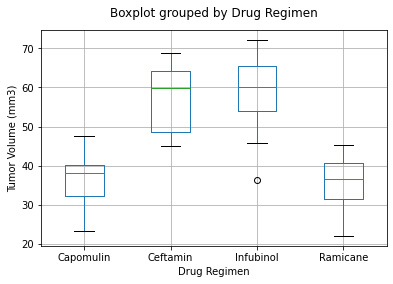

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group (https://github.com/lanakimova/matplotlib-challenge/blob/master/%20pymaceuticals_analysis.ipynb).
max_tumor_volume_df.boxplot(column=["Tumor Volume (mm3)"], by="Drug Regimen")
plt.title(" ")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Identify mice treated with Capomulin.
treated_mice = mouse_data_complete_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)", "Weight (g)"]]
treated_mice_Capo = treated_mice[treated_mice["Drug Regimen"] == "Capomulin"]
treated_mice_Capo["Mouse ID"].unique()
#treated_mice_selected = treated_mice_Capo
#treated_mice_selected["Mouse ID"].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

In [21]:
# Recall data for selected mouse (s710).
treated_mice_s710 = treated_mice_Capo[treated_mice_Capo["Mouse ID"] == "s710"]
treated_mice_s710

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Weight (g)
361,s710,Capomulin,0,45.000000,23
362,s710,Capomulin,5,43.180977,23
363,s710,Capomulin,10,43.688026,23
364,s710,Capomulin,15,41.845235,23
365,s710,Capomulin,20,42.629963,23
366,s710,Capomulin,25,43.060409,23
367,s710,Capomulin,30,43.571703,23
368,s710,Capomulin,35,44.160519,23
369,s710,Capomulin,40,40.171920,23
370,s710,Capomulin,45,40.728578,23


Text(0, 0.5, 'Tumor Volume (mm3)')

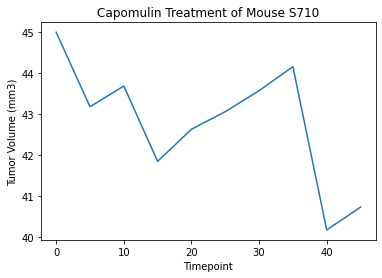

In [22]:
# Generate a line plot of tumor volume vs. timepoint for selected mouse (s710).
plt.plot(treated_mice_s710["Timepoint"], treated_mice_s710["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse S710")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

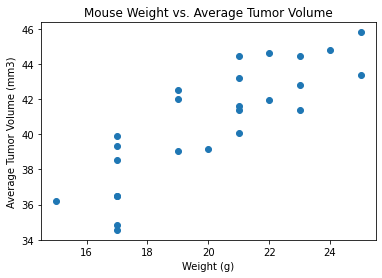

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen (https://github.com/lanakimova/matplotlib-challenge/blob/master/%20pymaceuticals_analysis.ipynb).
weight_mice = clean_mouse_data_df[["Mouse ID", "Weight (g)"]]
treated_mice_Capo = treated_mice_Capo.merge(weight_mice, on="Mouse ID")

mean_tumor_volume = treated_mice_Capo.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
treated_mice_Capo["Weight (g)"]
weight = treated_mice_Capo.groupby("Mouse ID")["Weight (g)"].mean()
                                        
plt.scatter(weight, mean_tumor_volume)
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, mean_tumor_volume)
print(f"The correlation coefficient between mouse weight and the average tumor volume is {correlation[0]}.")

The correlation coefficient between mouse weight and the average tumor volume is 0.8419363424694719.


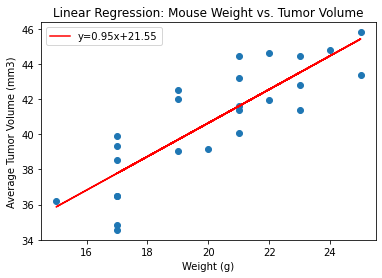

In [26]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen (https://github.com/lanakimova/matplotlib-challenge/blob/master/%20pymaceuticals_analysis.ipynb).
tumor_slope, tumor_intercept, tumor_rvalue, tumor_pvalue, tumor_stderr = linregress(weight, mean_tumor_volume)
tumor_fit = tumor_slope * weight + tumor_intercept

plt.scatter(weight, mean_tumor_volume)
plt.plot(weight, tumor_fit,"-", color='red', label="y={:.2f}x+{:.2f}".format(tumor_slope, tumor_intercept))
plt.title('Linear Regression: Mouse Weight vs. Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()